In [135]:
import pandas as pd
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header = None)


In [136]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [137]:
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0
                                                )

## Step 1. Standardization

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

- remember thant the sc.fit_transform output is (123, 13)
- but we need combine the 13 observation together then need transpose back

In [140]:
X_train_std.shape

(124, 13)

In [141]:
X_train_std.T.shape

(13, 124)

## Step 2. Covariance matrix

In [142]:
import numpy as np
cov_mat = np.cov(X_train_std.T)

## Step 3. Engen_Value and Engen_Vec

In [143]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [144]:
tot = np.sum(eigen_vals)
cum_var_exp = np.cumsum(var_exp)

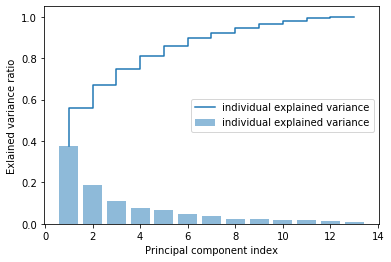

In [145]:
import matplotlib.pyplot as plt
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
       label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='pre',
        label='individual explained variance')
plt.ylabel('Exlained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

## Step 4. Sort eigen_val and extract eigen_vec

In [146]:
# eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vec[:,i]) 
#                for i in range(len(eigen_vals))]

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
                for i in range(len(eigen_vals))]

In [147]:
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

## Step 5. Select k eigen vectors
- Here we substract k = 2

## Step 6. Construct the projection matrix w

In [148]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

In [149]:
w

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

## Step 7. Transform the d-dimension to k dimension

In [179]:
X_train_pca = X_train_std.dot(w)

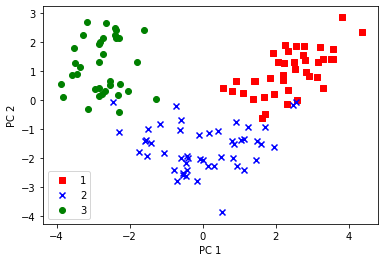

In [180]:
## Visualization
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for num, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==num, 0],
                X_train_pca[y_train==num, 1],
                c=c, label=num, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

### important notice:
- PCA directions (eigenvector) are highly sensitive to data scaling --> standardscaler is important
- k can be decided by trade-off test or cross validation

## Logistic regression

In [181]:
from matplotlib.colors import ListedColormap
def plot_decision_region(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

In [190]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

C:\Users\ruire\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ruire\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


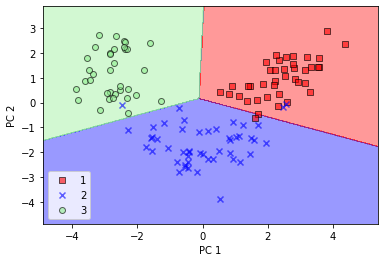

In [191]:
lr.fit(X_train_pca, y_train)
plot_decision_region(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()